In [44]:
from src.data_importation import (
    load_data,
    get_coords,
    add_coords_to_df,
    pivot_df,
    filter_columns_by_month,
)
from src.data_exportation import export_data
from script.data_visualization import create_map
import pandas as pd

In [ ]:
ADMIN_LEVEL = 3
input_df = load_data()
coords_dict = get_coords(input_df, ADMIN_LEVEL)
df = input_df.copy()

Getting coordinates: 100%|██████████| 326/326 [04:50<00:00,  1.12it/s]


In [4]:
df = add_coords_to_df(df, coords_dict, ADMIN_LEVEL)
df = df.dropna()
export_data(df, "data/flood_data.csv")

In [48]:
# df = pd.read_csv("data/flood_data.csv")
df["Start_Date"] = pd.to_datetime(df["Start_Date"])
df["End_Date"] = pd.to_datetime(df["End_Date"])

data_df = pivot_df(df, 3, interpolate=False)
print(data_df.shape)

(324, 123)


In [52]:
september_df = filter_columns_by_month(data_df, "2024-09")
# september_df = september_df.drop(columns=["Latitude", "Longitude"], axis=1)
# Some custom date's to make it corrospond to the data
september_df = september_df.drop(september_df.columns[2:9], axis=1)
# september_df = september_df.drop(september_df.columns[-:], axis=1)

september_df.to_csv("data/september_flood_data.csv", index=True)
september_df.head()

,Latitude,Longitude,2024-09-08 00:00:00,2024-09-09 00:00:00,2024-09-10 00:00:00,2024-09-11 00:00:00,2024-09-12 00:00:00,2024-09-13 00:00:00,2024-09-14 00:00:00,2024-09-15 00:00:00,...,2024-09-21 00:00:00,2024-09-22 00:00:00,2024-09-23 00:00:00,2024-09-24 00:00:00,2024-09-25 00:00:00,2024-09-26 00:00:00,2024-09-27 00:00:00,2024-09-28 00:00:00,2024-09-29 00:00:00,2024-09-30 00:00:00
Admin3,,,,,,,,,,,,,,,,,,,,,
Ahlone,16.79,96.13,0.32,0.32,NaN,0.32,NaN,NaN,NaN,0.32,...,0.32,0.32,0.32,NaN,NaN,NaN,0.32,0.75,NaN,0.75
Amarapura,21.90,96.05,414.83,414.83,NaN,575.80,NaN,NaN,NaN,575.80,...,618.31,618.31,618.31,NaN,NaN,NaN,618.31,634.54,NaN,634.54
Ann,19.92,94.03,1802.69,1957.12,NaN,1957.12,NaN,NaN,NaN,1957.12,...,2256.84,2256.84,2256.84,NaN,NaN,NaN,2256.84,2258.82,NaN,2349.57
Aunglan,19.20,95.50,627.66,627.66,NaN,627.66,NaN,NaN,NaN,627.66,...,730.66,730.66,730.66,NaN,NaN,NaN,730.66,837.89,NaN,837.89
Aungmyaythazan,21.99,96.10,3.25,3.25,NaN,3.25,NaN,NaN,NaN,3.25,...,3.31,3.31,3.31,NaN,NaN,NaN,3.31,3.31,NaN,3.31


In [53]:
townships = "Taungoo" # Toungoo
september_df.loc[townships]

Latitude                  18.81
Longitude                 96.24
2024-09-08 00:00:00     7007.65
2024-09-09 00:00:00     7007.65
2024-09-10 00:00:00         NaN
2024-09-11 00:00:00     7545.12
2024-09-12 00:00:00         NaN
2024-09-13 00:00:00         NaN
2024-09-14 00:00:00         NaN
2024-09-15 00:00:00     7545.12
2024-09-16 00:00:00    11119.71
2024-09-17 00:00:00         NaN
2024-09-18 00:00:00    11119.71
2024-09-19 00:00:00         NaN
2024-09-20 00:00:00    12098.06
2024-09-21 00:00:00    12098.06
2024-09-22 00:00:00    12098.06
2024-09-23 00:00:00    12098.06
2024-09-24 00:00:00         NaN
2024-09-25 00:00:00         NaN
2024-09-26 00:00:00         NaN
2024-09-27 00:00:00    12098.06
2024-09-28 00:00:00    14686.89
2024-09-29 00:00:00         NaN
2024-09-30 00:00:00    14686.89
Name: Taungoo, dtype: float64

Adding locations: 323it [00:00, 778.54it/s]


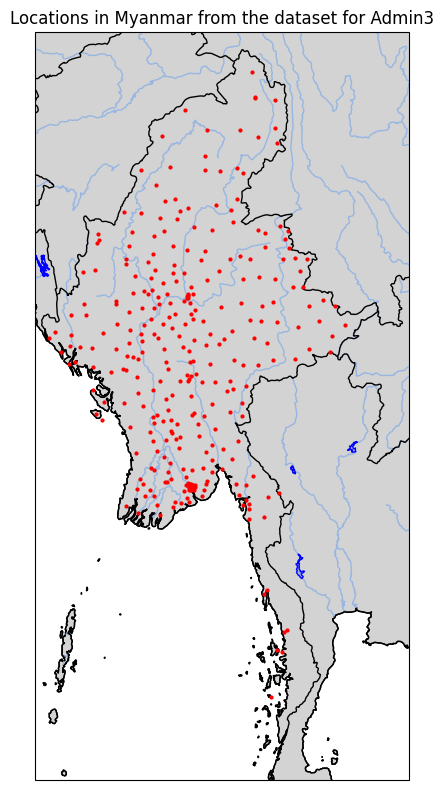

In [55]:
map_df = september_df.reset_index()
create_map(map_df, ADMIN_LEVEL)